In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [3]:
filepath = 'complaints.csv'
try:
    df = pd.read_csv(filepath, usecols=['Product', 'Consumer complaint narrative'])
except FileNotFoundError:
    print(f"Error: Not Found '{filepath}'.")
    raise

In [4]:
df_clean = df.dropna().copy()
print(f"Original rows: {len(df)}")
print(f"Rows after dropping nulls: {len(df_clean)}")

Original rows: 11821054
Rows after dropping nulls: 3472005


In [5]:
print("\nProduct Categories (Top 15):")
print(df_clean['Product'].value_counts().head(15))


Product Categories (Top 15):
Product
Credit reporting or other personal consumer reports                             1481374
Credit reporting, credit repair services, or other personal consumer reports     807276
Debt collection                                                                  378408
Checking or savings account                                                      156243
Mortgage                                                                         135544
Credit card or prepaid card                                                      108666
Money transfer, virtual currency, or money service                               105249
Credit card                                                                       96486
Student loan                                                                      56969
Vehicle loan or lease                                                             44140
Credit reporting                                                                  

C:\Users\shrey\AppData\Local\Temp\ipykernel_52676\3857640968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


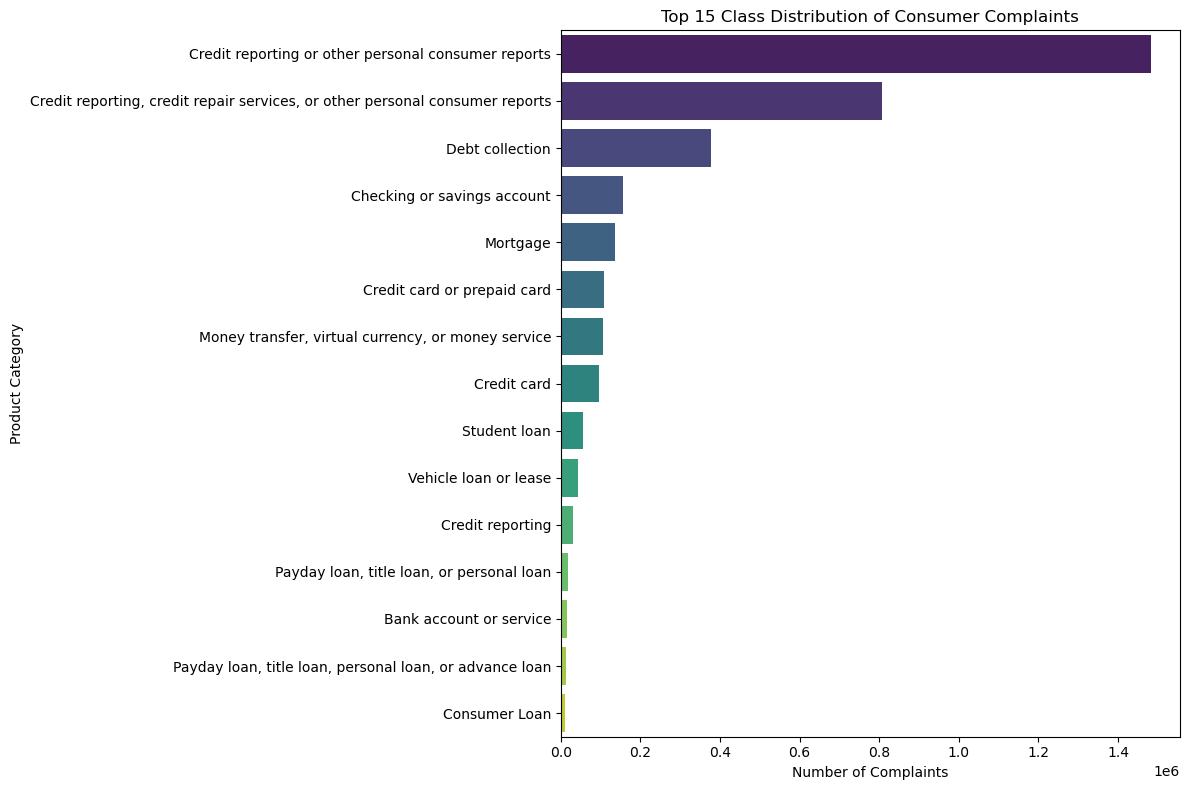

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y='Product', 
    data=df_clean, 
    order=df_clean['Product'].value_counts().index[:15],
    palette='viridis'
)
plt.title('Top 15 Class Distribution of Consumer Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [7]:
total_size = len(df_clean)
sample_size = 100000 

if total_size > sample_size:
    df_remaining, df_sample = train_test_split(
        df_clean,
        test_size=sample_size,
        random_state=42,
        stratify=df_clean['Product']
    )
else:
    df_sample = df_clean

In [8]:
print(f"\nUsing a stratified sample of {len(df_sample)} rows for the project.")
print("\nSampled Class Distribution (as percentages):")
print((df_sample['Product'].value_counts() / len(df_sample)).head(15))

df_sample.to_csv('complaints_sample_100k.csv', index=False)
print("\nSaved 100k sample to 'complaints_sample_100k.csv'")


Using a stratified sample of 100000 rows for the project.

Sampled Class Distribution (as percentages):
Product
Credit reporting or other personal consumer reports                             0.42666
Credit reporting, credit repair services, or other personal consumer reports    0.23251
Debt collection                                                                 0.10899
Checking or savings account                                                     0.04500
Mortgage                                                                        0.03904
Credit card or prepaid card                                                     0.03130
Money transfer, virtual currency, or money service                              0.03031
Credit card                                                                     0.02779
Student loan                                                                    0.01641
Vehicle loan or lease                                                           0.01271
Credit 

In [9]:
data_file = 'complaints_sample_100k.csv'
try:
    df_sample = pd.read_csv(data_file)
except FileNotFoundError:
    print(f"Error: Not Found '{data_file}'.")
    raise

In [10]:
df_sample = df_sample.dropna(subset=['Consumer complaint narrative', 'Product'])

print(f"Loaded {len(df_sample)} rows from {data_file}.")


X = df_sample['Consumer complaint narrative']
y = df_sample['Product']

# stratify=y is CRITICAL to ensure both sets have the same class imbalance.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, # 20% for testing
    random_state=42, 
    stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Loaded 100000 rows from complaints_sample_100k.csv.
Training samples: 80000
Test samples: 20000


In [11]:
baseline_model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(
        random_state=42, 
        max_iter=1000,  
        multi_class='multinomial'
    ))
])

In [12]:

print("\nStarting model training...")

# This will run both the TF-IDF vectorization and the Logistic Regression training
baseline_model.fit(X_train, y_train)

print("Model training complete.")

# Evaluate
print("\nEvaluating model on the test set...")
y_pred = baseline_model.predict(X_test)


print("\n--- Baseline Model Classification Report ---")
report = classification_report(y_test, y_pred)
print(report)



Starting model training...


c:\Users\shrey\anaconda3\envs\llms\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model training complete.

Evaluating model on the test set...

--- Baseline Model Classification Report ---
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.50      0.03      0.07        86
                                                 Checking or savings account       0.69      0.85      0.76       900
                                                               Consumer Loan       1.00      0.02      0.04        55
                                                                 Credit card       0.51      0.34      0.41       556
                                                 Credit card or prepaid card       0.51      0.54      0.53       626
                                                            Credit reporting       0.73      0.09      0.16       182
                         Credit reporting or other personal consu

c:\Users\shrey\anaconda3\envs\llms\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shrey\anaconda3\envs\llms\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shrey\anaconda3\envs\llms\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]